C:\Users\dell\AppData\Local\Temp\ipykernel_14316\1044349398.py:28: RuntimeWarning: invalid value encountered in divide
  autocorr_result /= np.max(np.abs(autocorr_result))


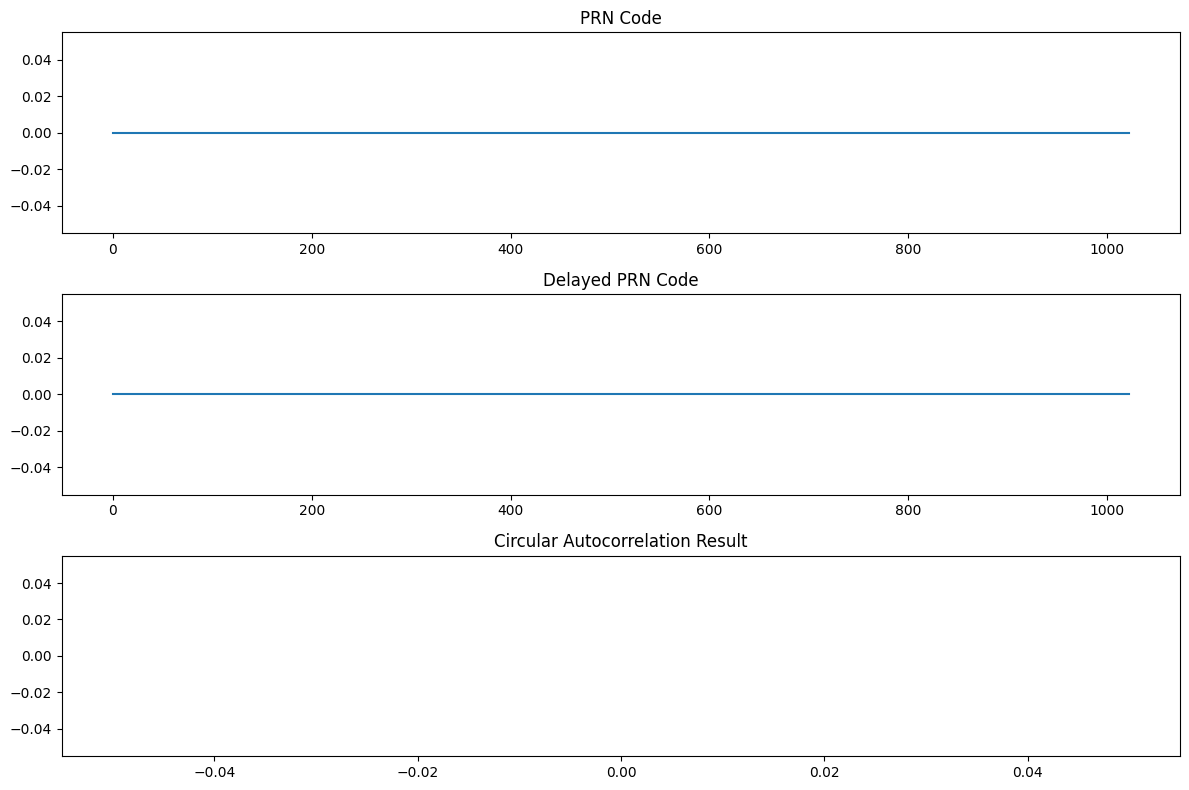

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def generate_prn_code(prn_number, length):
    prn_code = np.zeros(length, dtype=int)
    feedback_mask = [1, 8]  

    for i in range(1, length):
        feedback = np.bitwise_xor(int(prn_code[feedback_mask[0] - 1]), int(prn_code[feedback_mask[1] - 1]))
        prn_code = np.roll(prn_code, 1)
        prn_code[0] = feedback

    return prn_code

prn_number = 8
delay = 200
length = 1023

# Generate PRN codes
prn_code = generate_prn_code(prn_number, length)
prn_code_delayed = np.roll(prn_code, delay)


autocorr_result = np.fft.ifft(np.fft.fft(prn_code) * np.conj(np.fft.fft(prn_code_delayed)))


autocorr_result /= np.max(np.abs(autocorr_result))

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(prn_code)
plt.title('PRN Code')

plt.subplot(3, 1, 2)
plt.plot(prn_code_delayed)
plt.title('Delayed PRN Code')

plt.subplot(3, 1, 3)
plt.plot(np.abs(autocorr_result))
plt.title('Circular Autocorrelation Result')

plt.tight_layout()
plt.show()
